In [10]:
!pip install seaborn

     ------------------------------------ 293.3/293.3 kB 464.8 kB/s eta 0:00:00


In [22]:
!pip install scikit-learn

     ---------------------------------------- 8.4/8.4 MB 2.1 MB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 594.5 kB/s eta 0:00:00
     -------------------------------------- 42.5/42.5 MB 629.7 kB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


# Machine Learning Model For Housing Dataset

The Dataset can be downloaded from kaggle website https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?select=Housing.csv

The task is to provide a machine learning model with Linear Regression model to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.

The dataset contains the following features:
- Price - Price of the houses (Target Feature).
- Area - Area of the house.
- Bedrooms - Number of bedrooms in the house.
- bathrooms - Number of bathrooms in the house.
- Stories - Number of House Stories.
- Mainroad - Road network to the house.
- Guestroom - The availability of guestroom in the house.
- Basement - The availability of basement in the house.
- HotWaterHeating - The availability of hot water heater in the house.
- Air Conditioning - The availability of air conditioning in the house.
- Parking - The availability of parking in the house.
- Prefarea - The availability of prefarea in the house.
- Furnishingstatus - The availability of furnish, semifurnish, no furnish

In [51]:
#import necessary libaries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [52]:
house_df = pd.read_csv('Housing.csv') # reading the dataset to pandas
house_df.head() # Display the first few roles of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [53]:
house_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [54]:
house_df.shape # Number of Observation & Features

(545, 13)

In [55]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [56]:
house_df.isna().sum() # Checking for missing values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [57]:
pd.set_option('display.max_rows', None)

C:\Users\segun\AppData\Local\Temp\ipykernel_13820\86305537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house_df.corr()


Text(0.5, 1.0, 'Correlation Matrix For Numeric Features')

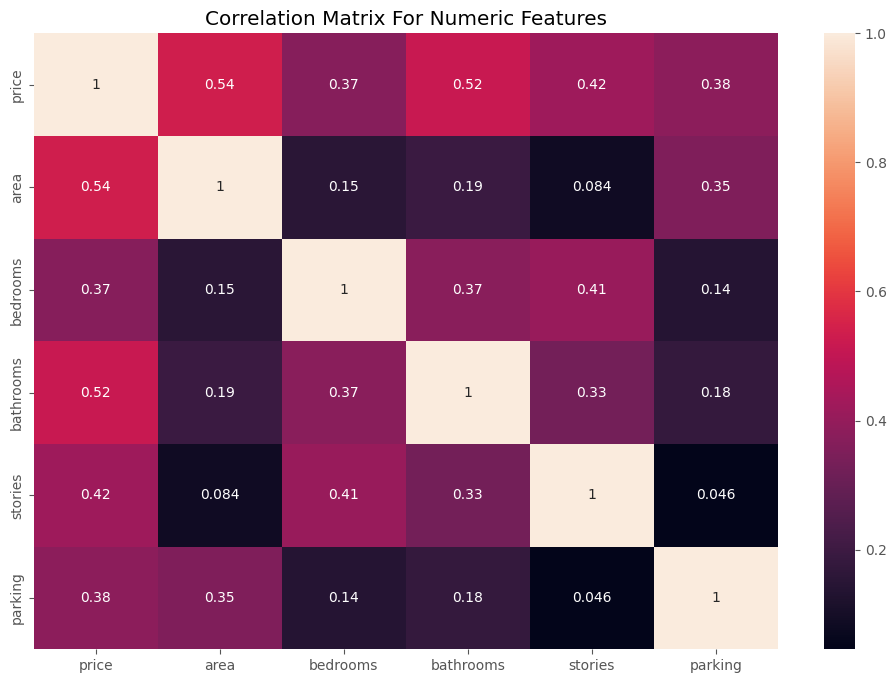

In [89]:
correlation_matrix = house_df.corr()
# Ploting the correlation of the features to one another
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix For Numeric Features')

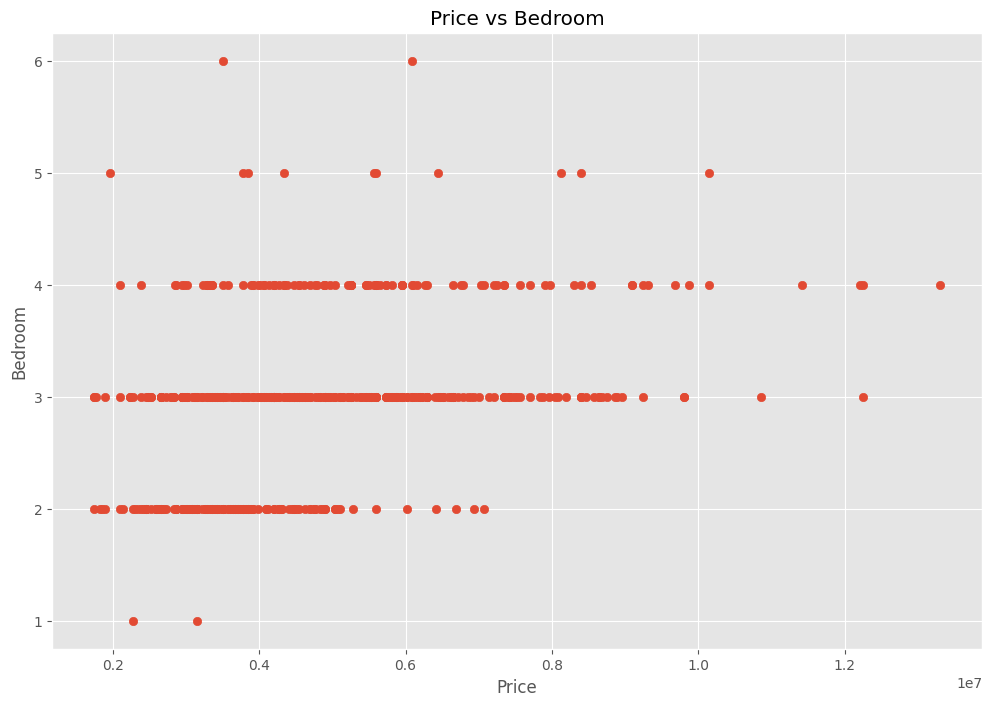

In [59]:
plt.scatter(x= house_df['price'], y=house_df['bedrooms'])
plt.title('Price vs Bedroom')
plt.xlabel('Price')
plt.ylabel('Bedroom')
plt.show()

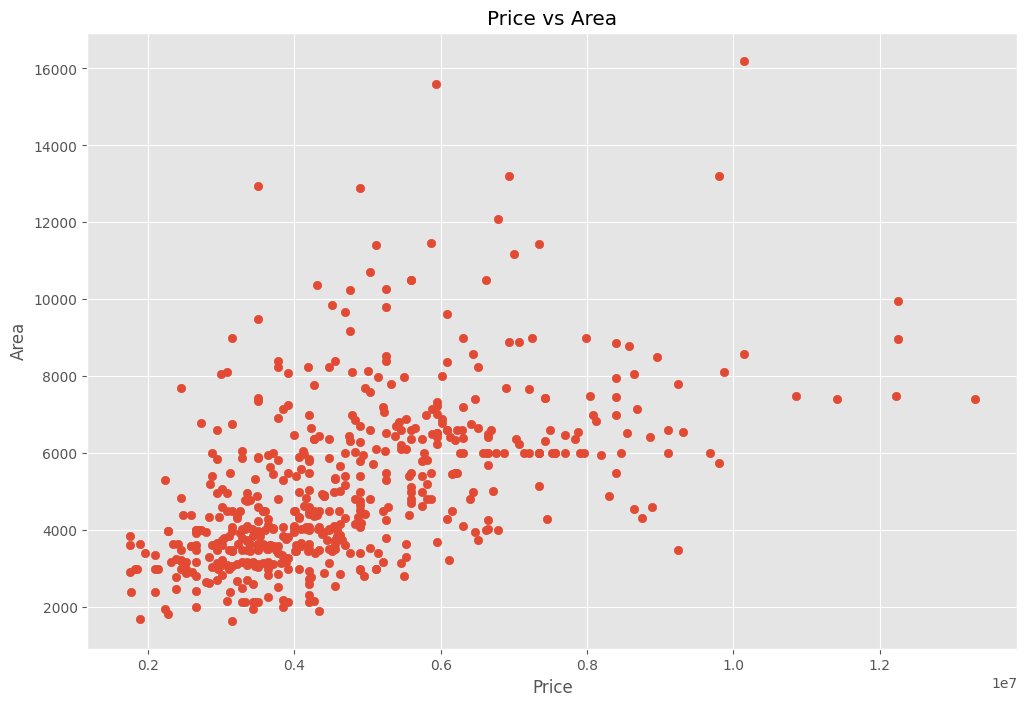

In [60]:
plt.scatter(x= house_df['price'], y=house_df['area'])
plt.title('Price vs Area')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

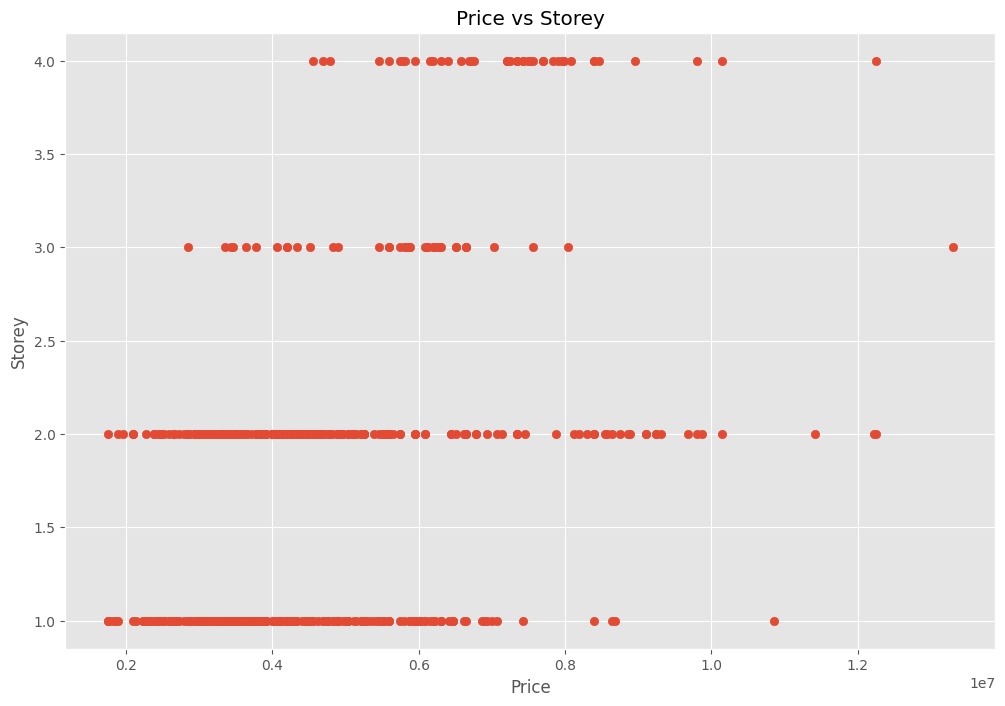

In [61]:
plt.scatter(x= house_df['price'], y=house_df['stories'])
plt.title('Price vs Storey')
plt.xlabel('Price')
plt.ylabel('Storey')
plt.show()

In [90]:
predictor = correlation_matrix['price'].sort_values(ascending=False)[1:5].index

predictor # The top four features that are highly correlated with the price of the houses

Index(['area', 'bathrooms', 'stories', 'parking'], dtype='object')

In [62]:
new_df = house_df.copy()

In [63]:
new_df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [64]:
# Encoding all categorical or object features to be numerical
new_df["mainroad"] = new_df["mainroad"].apply(lambda x: 1 if x == "yes" else 0)
new_df["guestroom"] = new_df["guestroom"].apply(lambda x: 1 if x == "yes" else 0)
new_df["basement"] = new_df["basement"].apply(lambda x: 1 if x == "yes" else 0)
new_df["hotwaterheating"] = new_df["hotwaterheating"].apply(lambda x: 1 if x == "yes" else 0)
new_df["airconditioning"] = new_df["airconditioning"].apply(lambda x: 1 if x == "yes" else 0)
new_df["prefarea"] = new_df["prefarea"].apply(lambda x: 1 if x == "yes" else 0)

In [65]:
# Encoding all categorical or object features to be numerical
new_df['furnishingstatus'] = new_df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished' : 2})

In [66]:
new_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [104]:
correlation_matrix = new_df.corr()

predictor = correlation_matrix['price'].sort_values(ascending=False)[1:5].index

predictor # The top four features that are highly correlated with the price of the houses after encoding of the object features

Index(['area', 'bathrooms', 'airconditioning', 'stories'], dtype='object')

In [96]:
from sklearn.preprocessing import StandardScaler
# Spliting the dataset into input and ouput or features and target
X = new_df.drop('price', axis=1) # features
y = new_df['price'] # Target
# Standardizing the datasets to rescale the features to have a mean and varience of 0 and 1 respectively
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) 

In [98]:
new_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [97]:
scaled_X

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.51769249,
         1.80494113,  1.40628573],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  2.67940935,
        -0.55403469,  1.40628573],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.51769249,
         1.80494113,  0.09166185],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.22296203],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469,  1.40628573],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.22296203]])

In [99]:
new_scale = pd.DataFrame(scaled_X, columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'])
# The standardized dataset is in numpy array and needs to be converted to pandas

new_scale.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,1.406286
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,0.091662
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286


In [100]:
# Spliting the features and target into 80% train and 20% test 

X_train, X_test, y_train, y_test = train_test_split(new_scale, y, test_size=0.2, random_state=12)

In [101]:
model = LinearRegression() # Instanstiating the linear regression model for use
model.fit(X_train, y_train)

LinearRegression()

In [102]:
X_train_prediction = model.predict(X_train)
error_score = metrics.r2_score(y_train, X_train_prediction)
print('R square error : ', error_score)

R square error :  0.6501716797053578


In [103]:
X_test_prediction = model.predict(X_test)
error_score1 = metrics.r2_score(y_test, X_test_prediction)
print('R square error : ', error_score1)

R square error :  0.7246609398021716


## Conclusion

With a test accuracy of 72.5%. The model accuracy is not good enough and still needs to be further optimized or use another machine learning model to get the best accuracy that will help predict our housing dataset.